In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def population(size_of_pop, n):
    return [indiv(n) for i in range(size_of_pop)]

In [5]:
def indiv(n):
    return [random.choice([0, 1]) for i in range(n)]

In [6]:
def fitness(indiv):
    #return indiv[0] + (indiv[1] * 2) + (indiv[2] * 4) + (indiv[3] * 8) - (indiv[4] * 16)
    u = indiv[0] + (indiv[1]) + (indiv[2]) + (indiv[3])
    if u < 4:
        return (indiv[1] * indiv[2]) - 2 * (indiv[0] * u)
    else:
        return -1

In [7]:
def mutate(population, n, type=1, perc=0.1):
    if type == 1:
        for indiv in population:
            if random.random() < perc:
                place = random.randint(0, n - 1)
                if indiv[place]:  indiv[place] = 0 
                else: indiv[place] = 1
    elif type == 2:
        for indiv in population:
            if random.random() < perc:
                for place, _ in enumerate(indiv):
                    if indiv[place]:  indiv[place] = 0 
                    else: indiv[place] = 1    
    return population

In [8]:
def crossover(parents, num_children, mode=1):
    children = []
    for i in range(num_children):
        par1 = random.choice(parents)
        par2 = random.choice(parents)
        while(par1 == par2):
            par1 = random.choice(parents)
            par2 = random.choice(parents)
            
        if mode == 1:
            new_child1 = par1[:int(len(par1)/2)] + par2[int(len(par1)/2):]
            new_child2 = par2[:int(len(par1)/2)] + par1[int(len(par1)/2):]
        elif mode == 2:
            new_child1 = par1[:int(len(par1)/3)] + par2[int(len(par1)/3):int(2 * len(par1)/3)] + par1[int(2 * len(par1)/3):]
            new_child2 = par2[:int(len(par1)/3)] + par1[int(len(par1)/3):int(2 * len(par1)/3)] + par2[int(2 * len(par1)/3):]
        else:
            new_child1 = []
            new_child2 = []
            for i in range(len(par1)):
                whi = random.choice([0, 1])
                if whi:
                    new_child1.append(par1[i])
                    new_child2.append(par2[i])
                else:
                    new_child1.append(par2[i])
                    new_child2.append(par1[i])
        children.append(new_child1)
        children.append(new_child2)
    parents.extend(children)
    par = []
    for i, el in enumerate(parents):
        if el not in parents[i + 1:]:
            par.append(el)
    return par

In [9]:
def select(pop_fit, type=1, top_parents=0.4, select_parents=0.1):
    if type == 1:
        num_best_parents = int(top_parents * len(pop_fit))
        parents = pop_fit[:num_best_parents]
        parents = [i[1] for i in parents]
        chosen = [indiv[1] for indiv in pop_fit[num_best_parents:] 
                  if select_parents > random.random()]
        parents.extend(chosen)
    elif type == 2: 
        num_best_parents = int(top_parents * len(pop_fit))
        parents = pop_fit[:num_best_parents]
        parents = [i[1] for i in parents]
    return parents

In [10]:
def evolve(pop, size_of_pop, n, top_parents=0.4, select_parents=0.1):
    pop_fit = sorted([(fitness(indiv), indiv) for indiv in pop], reverse=True)
    parents = select(pop_fit)
    parents = crossover(parents, size_of_pop - len(parents), mode=2)
    parents = mutate(parents, n)
    for i in parents:
        if (fitness(i), i) not in pop_fit:
            pop_fit.append((fitness(i), i))
    pop_fit = sorted(pop_fit, reverse=True)[:size_of_pop]
    pop = [i[1] for i in pop_fit]
    return pop, pop_fit

In [11]:
def genetic_algorithm(size_of_pop, n):
    pop = population(size_of_pop, n)
    i = 1
    res = []
    while True:
        pop, pop_fit = evolve(pop, size_of_pop, n)
        #print('Step {}: {}'.format(i, pop_fit[0]))
        res.append(pop_fit[0][0])
        if i == 10:
            break
        i = i + 1
    plt.plot(res)
    print(pop_fit[0][1])

[0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 

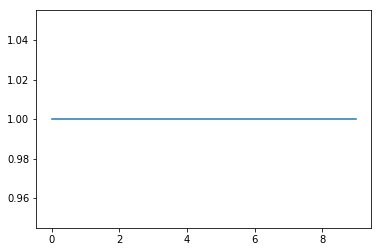

In [17]:
genetic_algorithm(100, 100000)